In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models  
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [85]:
data_train_path = r"E:\Data Set\Fruits Classification\train"
data_test_path = r"E:\Data Set\Fruits Classification\test"
data_valid_path = r"E:\Data Set\Fruits Classification\valid"

In [86]:
img_width = 180
img_height = 180

In [87]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

In [88]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    image_size = (img_width, img_height),
    batch_size = 32,
    shuffle = True,
)

Found 9700 files belonging to 5 classes.


In [89]:
train_names = data_train.class_names
train_names

['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']

In [90]:
valid_data = tf.keras.utils.image_dataset_from_directory(
    data_valid_path,
    image_size = (img_width, img_height),
    batch_size = 32,
    shuffle = False,
)

Found 200 files belonging to 5 classes.


In [91]:
test_data = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width, img_height),
    batch_size = 32,
    shuffle = False,
)

Found 100 files belonging to 5 classes.


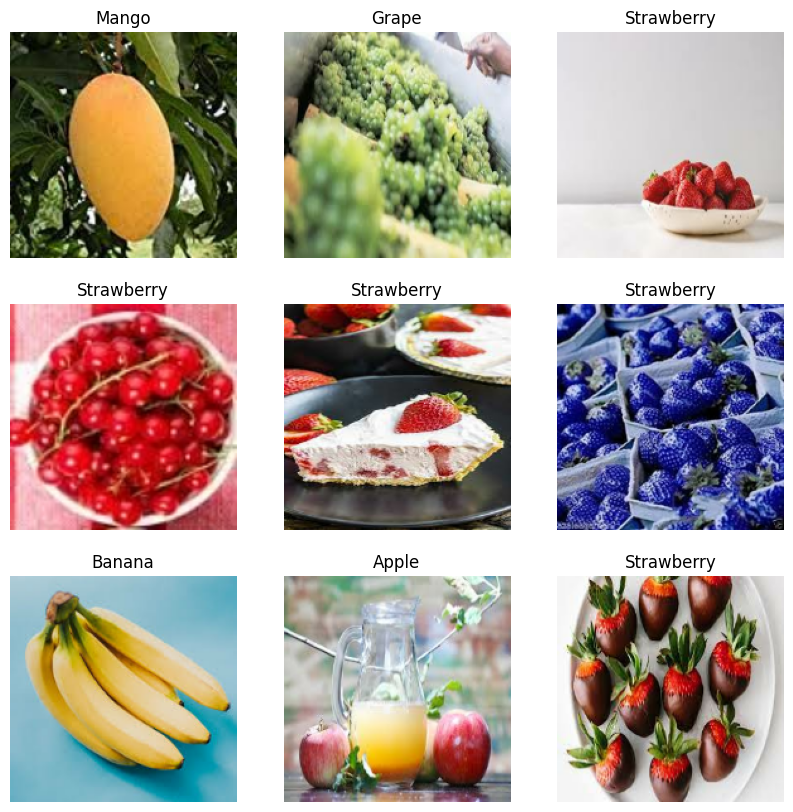

In [107]:
plt.figure(figsize=(10,10))
for image , labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(train_names[labels[i]])
        plt.axis('off')

In [93]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_width, img_height, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False


C:\Users\Talaat Mostafa\AppData\Local\Temp\ipykernel_24012\2517882765.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


In [94]:
model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.4),
    layers.Dense(len(train_names), activation='softmax')
])

In [95]:
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [96]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# تدريب الموديل
history = model.fit(
    data_train,
    validation_data=valid_data,
    epochs=10,
    callbacks=[early_stop]
)

Epoch 1/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 130s 367ms/step - accuracy: 0.5716 - loss: 3.1689 - val_accuracy: 0.8550 - val_loss: 1.6943
Epoch 2/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 155s 509ms/step - accuracy: 0.7761 - loss: 1.6782 - val_accuracy: 0.8450 - val_loss: 1.1597
Epoch 3/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 176s 578ms/step - accuracy: 0.7961 - loss: 1.1852 - val_accuracy: 0.8400 - val_loss: 0.8737
Epoch 4/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 174s 572ms/step - accuracy: 0.8028 - loss: 0.9561 - val_accuracy: 0.8100 - val_loss: 0.7617
Epoch 5/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 176s 579ms/step - accuracy: 0.8116 - loss: 0.8234 - val_accuracy: 0.8600 - val_loss: 0.6525
Epoch 6/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 157s 516ms/step - accuracy: 0.8087 - loss: 0.7694 - val_accuracy: 0.8750 - val_loss: 0.6126
Epoch 7/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 106s 348ms/step - accuracy: 0.8148 - loss: 0.7222 - val_accuracy: 0.8600 - val_loss: 0.5968
Epoch 8/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 107s 352ms/step - accuracy: 0.8161 -

In [97]:
loss , accuracy = model.evaluate(data_train)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

304/304 ━━━━━━━━━━━━━━━━━━━━ 43s 141ms/step - accuracy: 0.8751 - loss: 0.5386
Test Loss: 0.5270, Test Accuracy: 0.8823


In [98]:
image = r"E:\Data Set\Fruits Classification\test\Mango\Mango (70).jpeg"
img = tf.keras.utils.load_img(image , target_size=(img_width, img_height))
img_array = tf.keras.utils.img_to_array(img)
img_finl = tf.expand_dims(img_array , 0)

In [99]:
pred = model.predict(img_finl)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


In [100]:
score = (tf.nn.softmax(pred))
score

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[0.15191376, 0.1500281 , 0.14991897, 0.39850238, 0.14963682]],
      dtype=float32)>

In [101]:
print(f"Prediction Class : {train_names[np.argmax(score[0])]} , with a confidence of {max(score[0]) * 100 :.2f}%")

Prediction Class : Mango , with a confidence of 39.85%


In [102]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.8794 - loss: 0.5020 
Test Loss: 0.5097, Test Accuracy: 0.8600


In [103]:
data_pred = model.predict(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step


In [104]:
model.evaluate(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.8794 - loss: 0.5020 


[0.5097241401672363, 0.8600000143051147]

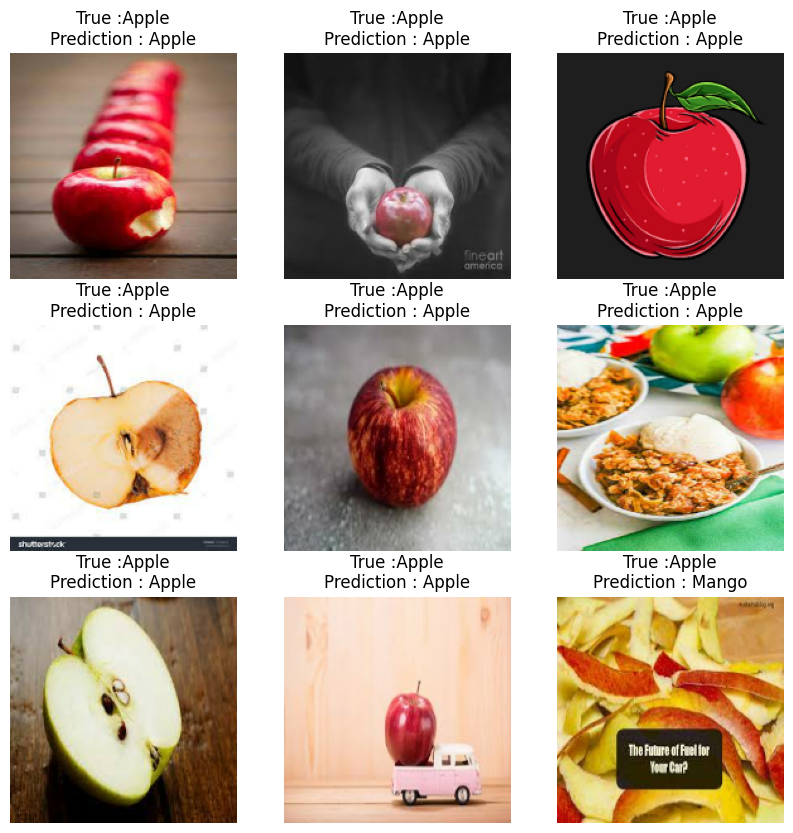

In [108]:
plt.figure(figsize=(10,10))
for image , labels in test_data.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(f"True :{train_names[np.argmax(labels[i])]}\nPrediction : {train_names[np.argmax(data_pred[i])]}")
        plt.axis('off')

In [106]:
model.save('fruit_classification_model.h5')